## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

## 2. Data Loading

In [2]:
df = pd.read_csv('Final_Data.csv')
df.head()

,Title,Price,Id,Location,Mark,Model,Storage,Condition,screen_size,screen area,processor,rear_camera,front_camera,battery,operating_system,ram
0,Flip 4 99% full box,499.0,9419966,Phnom Penh,Samsung,Galaxy Z Fold4,128,Used,7.6,17.13,8,50,30.0,4400,12.0,8
1,I want sell phone galaxy Z fold 4 99%,1000.0,9423865,Phnom Penh,Samsung,Galaxy Z Fold4,256,Used,7.6,17.13,8,50,30.0,4400,12.0,8
2,Samsung ZFold4 (12g+512g)សុីម២ក្រុមហ៊ុនស្អាតសំ...,880.0,9423258,Phnom Penh,Samsung,Galaxy Z Fold4,512,Used,7.6,17.13,8,50,30.0,4400,12.0,8
3,#GalaxyZfold4 256g company,1249.0,9021923,Phnom Penh,Samsung,Galaxy Z Fold4,256,New,7.6,17.13,8,50,30.0,4400,12.0,8
4,"ចង់លក់-Sumsung-Z-Full-4,នៅស្អាត-(99%),របស់ក្រុ...",896.0,9024219,Phnom Penh,Samsung,Galaxy Z Fold4,256,Used,7.6,17.13,8,50,30.0,4400,12.0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             239 non-null    object 
 1   Price             239 non-null    float64
 2   Id                239 non-null    int64  
 3   Location          239 non-null    object 
 4   Mark              239 non-null    object 
 5   Model             239 non-null    object 
 6   Storage           239 non-null    int64  
 7   Condition         239 non-null    object 
 8   screen_size       239 non-null    float64
 9   screen area       239 non-null    float64
 10  processor         239 non-null    int64  
 11  rear_camera       239 non-null    int64  
 12  front_camera      239 non-null    float64
 13  battery           239 non-null    int64  
 14  operating_system  239 non-null    float64
 15  ram               239 non-null    int64  
dtypes: float64(5), int64(6), object(5)
memory us

### 2.1. Descriptive statistic

In [4]:
df.describe()

,Price,Id,Storage,screen_size,screen area,processor,rear_camera,front_camera,battery,operating_system,ram
count,239.000000,2.390000e+02,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,480.937364,9.341881e+06,163.414226,6.558996,10.812385,11.891213,23.246862,14.185774,3370.121339,12.631381,5.029289
std,295.921836,1.120171e+05,129.809136,0.937272,2.982221,2.519814,27.965197,10.228283,824.797488,1.814061,1.988195
min,1.000000,9.001799e+06,64.000000,4.700000,6.900000,8.000000,8.000000,1.200000,1821.000000,8.000000,2.000000
25%,184.500000,9.318968e+06,64.000000,5.500000,8.500000,11.000000,12.000000,7.000000,2691.000000,11.000000,3.000000
50%,499.000000,9.394517e+06,128.000000,6.800000,10.800000,14.000000,12.000000,12.000000,3687.000000,14.000000,6.000000
75%,675.000000,9.417256e+06,256.000000,7.400000,10.800000,14.000000,12.000000,12.000000,3687.000000,14.100000,6.000000
max,1249.000000,9.424431e+06,1000.000000,7.600000,17.130000,14.000000,108.000000,40.000000,5000.000000,14.100000,8.000000


In [5]:
df.describe(include=['O'])

,Title,Location,Mark,Model,Condition
count,239,239,239,239,239
unique,220,9,2,7,2
top,Iphone12ProMax(256G)99%,Phnom Penh,Apple,iPhone 12 Pro Max,Used
freq,4,205,197,89,228


### 2.2. Categorical features

In [6]:
categorical = df.select_dtypes(include = 'object')
categorical.head()

,Title,Location,Mark,Model,Condition
0,Flip 4 99% full box,Phnom Penh,Samsung,Galaxy Z Fold4,Used
1,I want sell phone galaxy Z fold 4 99%,Phnom Penh,Samsung,Galaxy Z Fold4,Used
2,Samsung ZFold4 (12g+512g)សុីម២ក្រុមហ៊ុនស្អាតសំ...,Phnom Penh,Samsung,Galaxy Z Fold4,Used
3,#GalaxyZfold4 256g company,Phnom Penh,Samsung,Galaxy Z Fold4,New
4,"ចង់លក់-Sumsung-Z-Full-4,នៅស្អាត-(99%),របស់ក្រុ...",Phnom Penh,Samsung,Galaxy Z Fold4,Used


### 2.3. Numerical features

In [7]:
numerical = df.select_dtypes(exclude = 'object')
numerical.head()

,Price,Id,Storage,screen_size,screen area,processor,rear_camera,front_camera,battery,operating_system,ram
0,499.0,9419966,128,7.6,17.13,8,50,30.0,4400,12.0,8
1,1000.0,9423865,256,7.6,17.13,8,50,30.0,4400,12.0,8
2,880.0,9423258,512,7.6,17.13,8,50,30.0,4400,12.0,8
3,1249.0,9021923,256,7.6,17.13,8,50,30.0,4400,12.0,8
4,896.0,9024219,256,7.6,17.13,8,50,30.0,4400,12.0,8


##  3. Data Cleaning

### 3.1. Missing Value

In [8]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]
feature_nan

[]

### 3.2. Duplicate

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop(columns = ['Title', 'Id', 'Location'], axis = 1)

### 3.3. Outlier

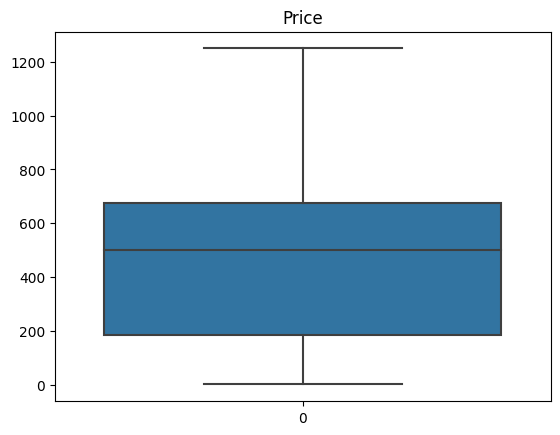

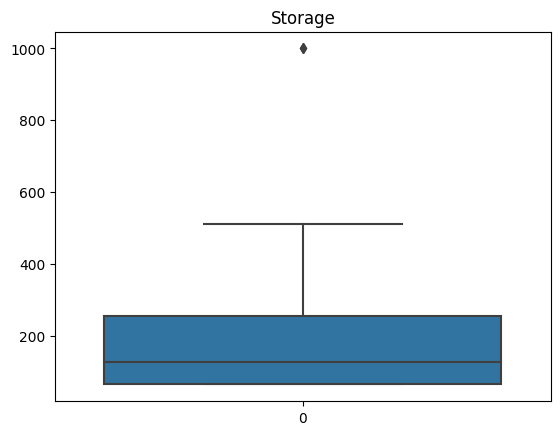

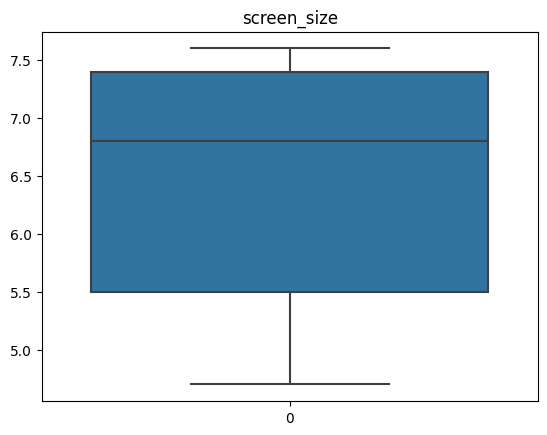

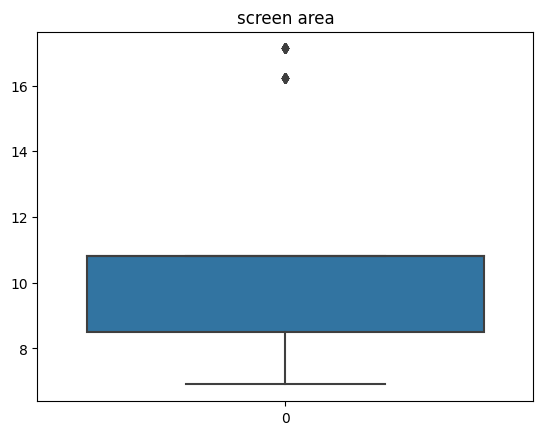

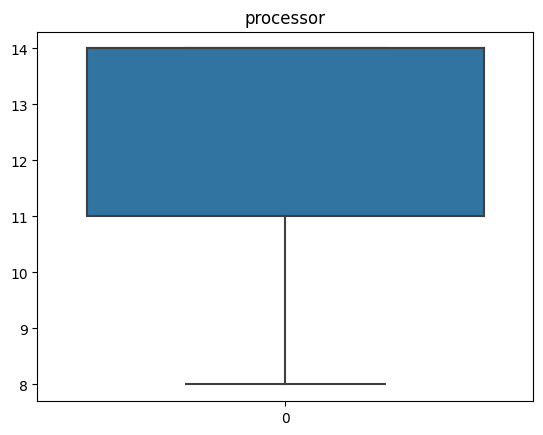

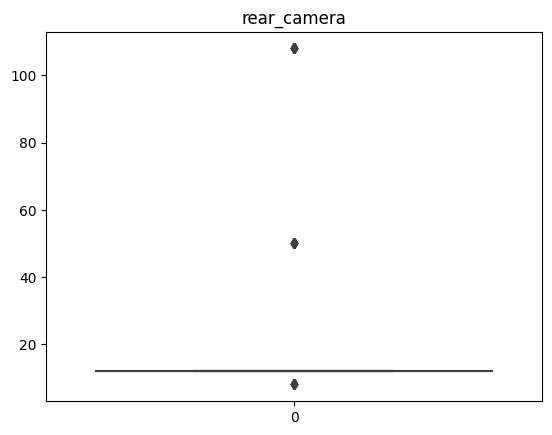

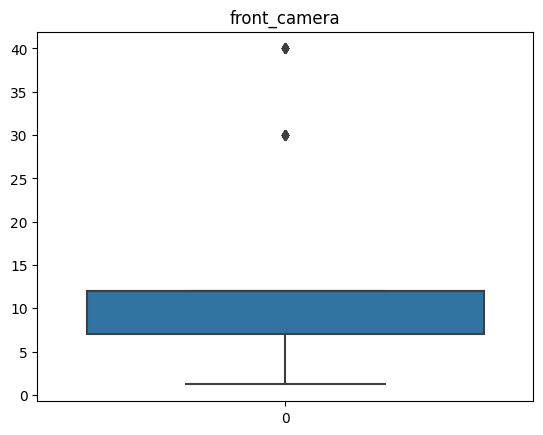

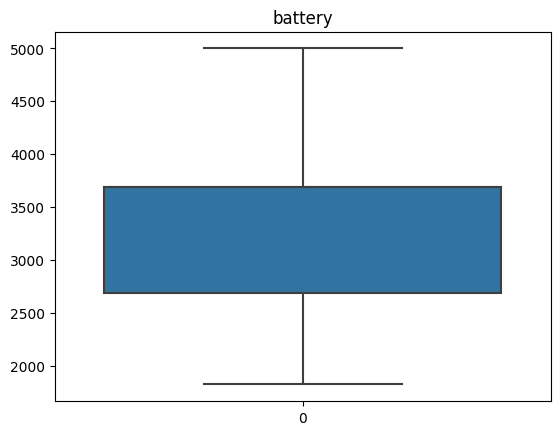

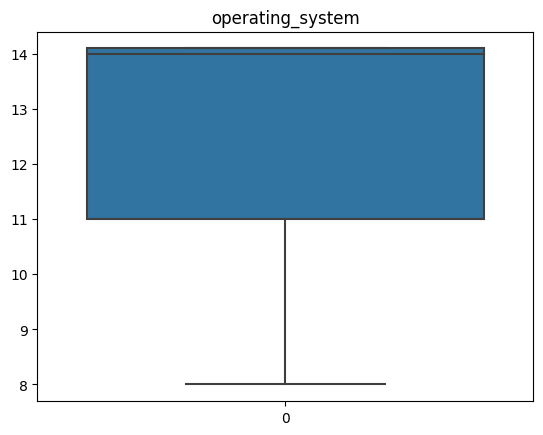

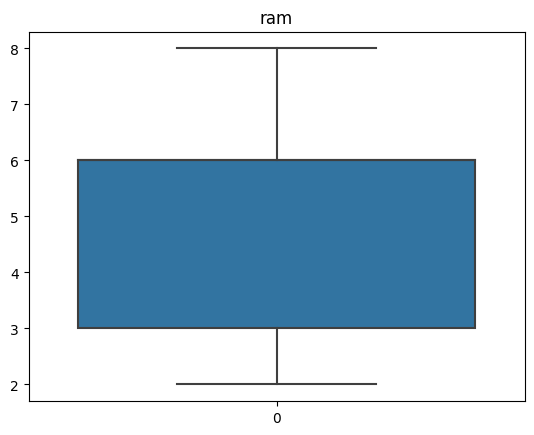

In [11]:
data = df.drop(columns = ['Mark', 'Model', 'Condition'])
for col in data.columns:
    plt.title(col)
    sns.boxplot(data[col])
    plt.show() 

* **There is no missing value and any duplicated.......**
* **For Title, Id and Location are not important for our project, so we decide to reject them** :)

## 4. EDA

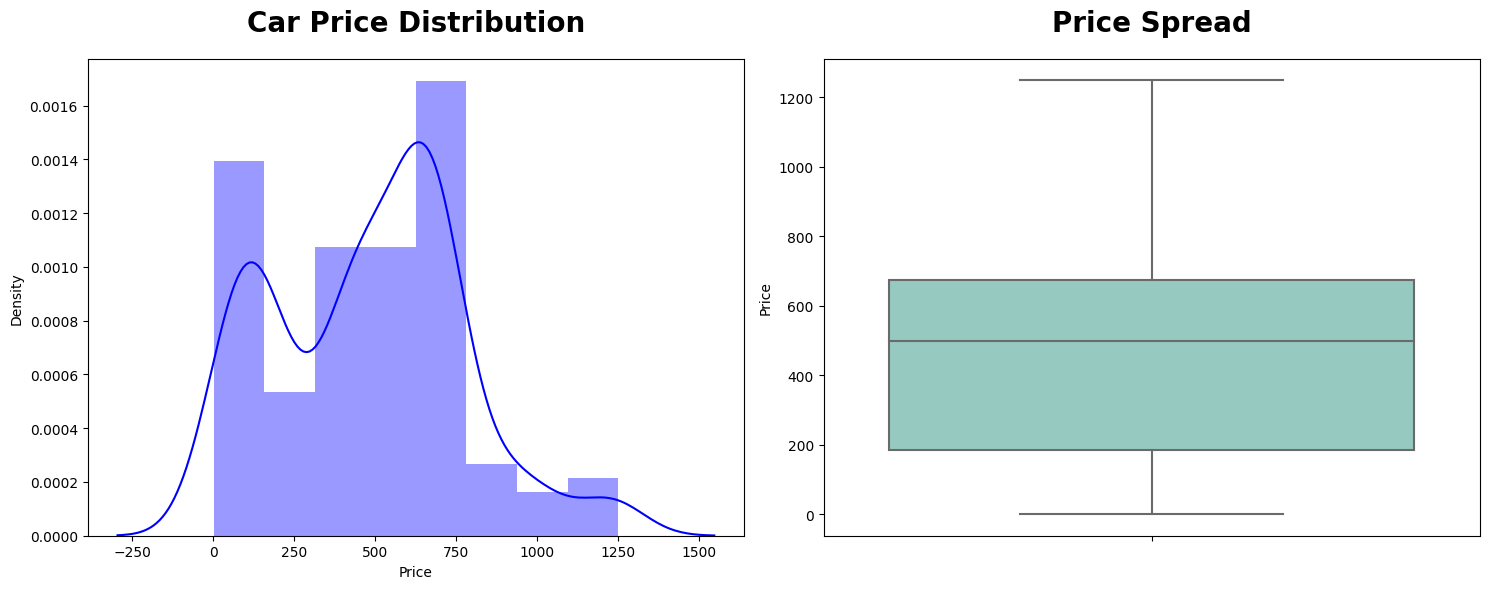

In [12]:
plt.figure(figsize= (15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['Price'], color='blue', kde = True)
plt.title('Car Price Distribution', fontweight = 'black', pad = 20, fontsize = 20)

plt.subplot(1, 2, 2)
sns.boxplot(y = df['Price'], palette= 'Set3')
plt.title('Price Spread', fontweight = 'black', pad = 20, fontsize = 20)
plt.tight_layout()
plt.show()

In [13]:
df['Price'].agg(['min', 'mean', 'median','max','std', 'skew']).to_frame().T

,min,mean,median,max,std,skew
Price,1.0,480.937364,499.0,1249.0,295.921836,0.25602


In [14]:
#sns.heatmap(df.corr(), annot=True)

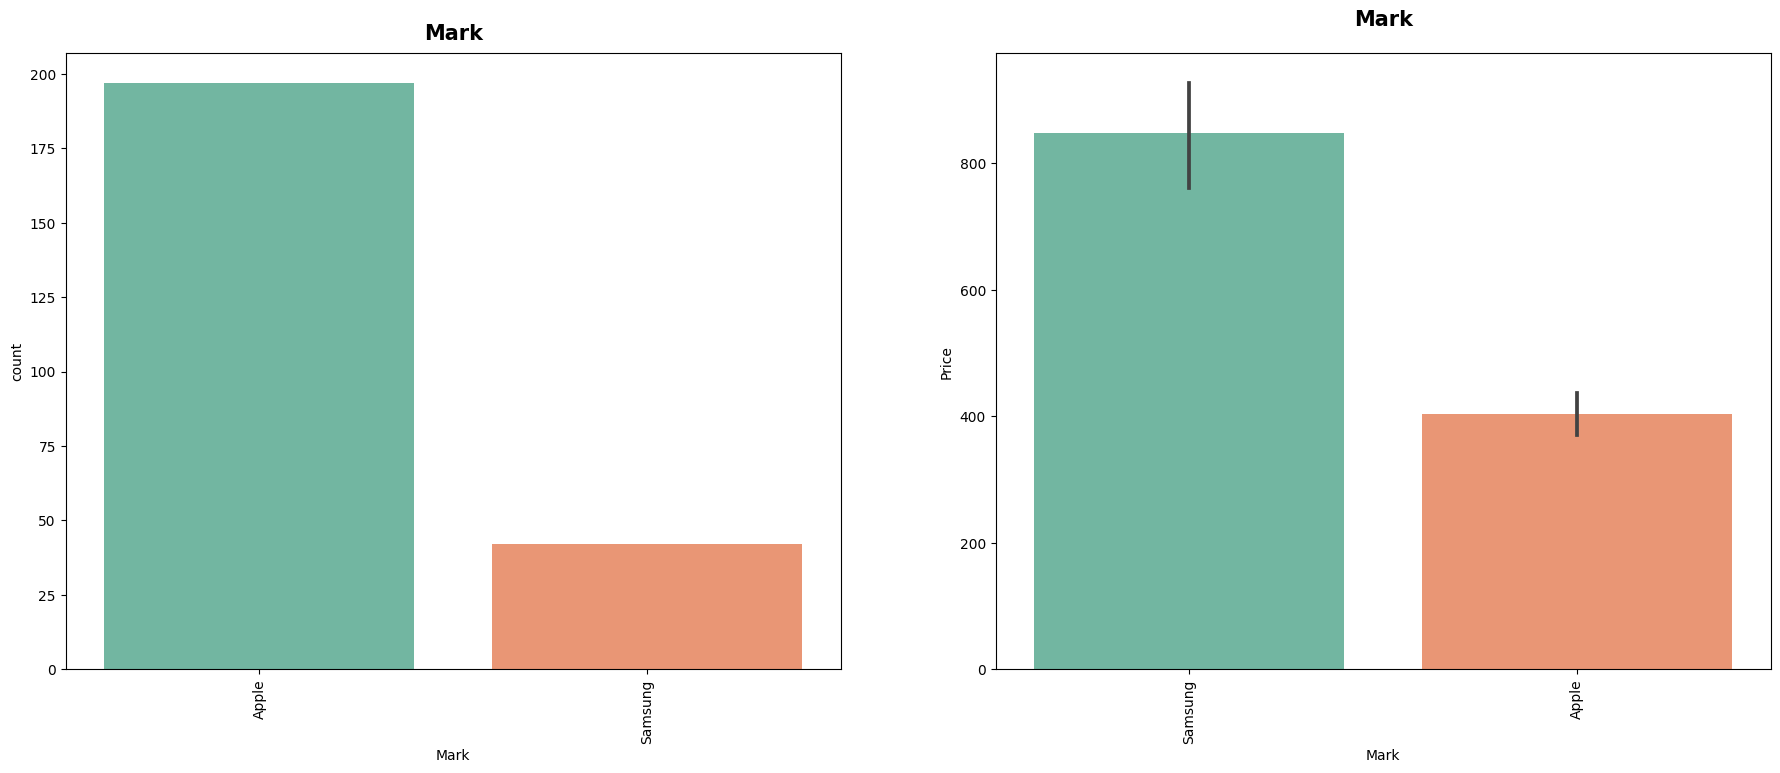

In [15]:
def visualize_categorical(cols):
    plt.figure(figsize = (22, 8))
    plt.subplot(1, 2, 1)
    sns.countplot(x = cols, data = df, palette = 'Set2', order = df[cols].value_counts().index)
    plt.title(f'{cols}', pad = 10, fontweight = 'black', fontsize = 15)
    plt.xticks(rotation = 90)

    plt.subplot(1, 2, 2)
    sns.barplot(x = cols, y = 'Price', data = df, palette = 'Set2')
    plt.title(f'{cols}', pad = 20, fontweight = 'black', fontsize = 15)
    plt.xticks(rotation = 90)
visualize_categorical('Mark')

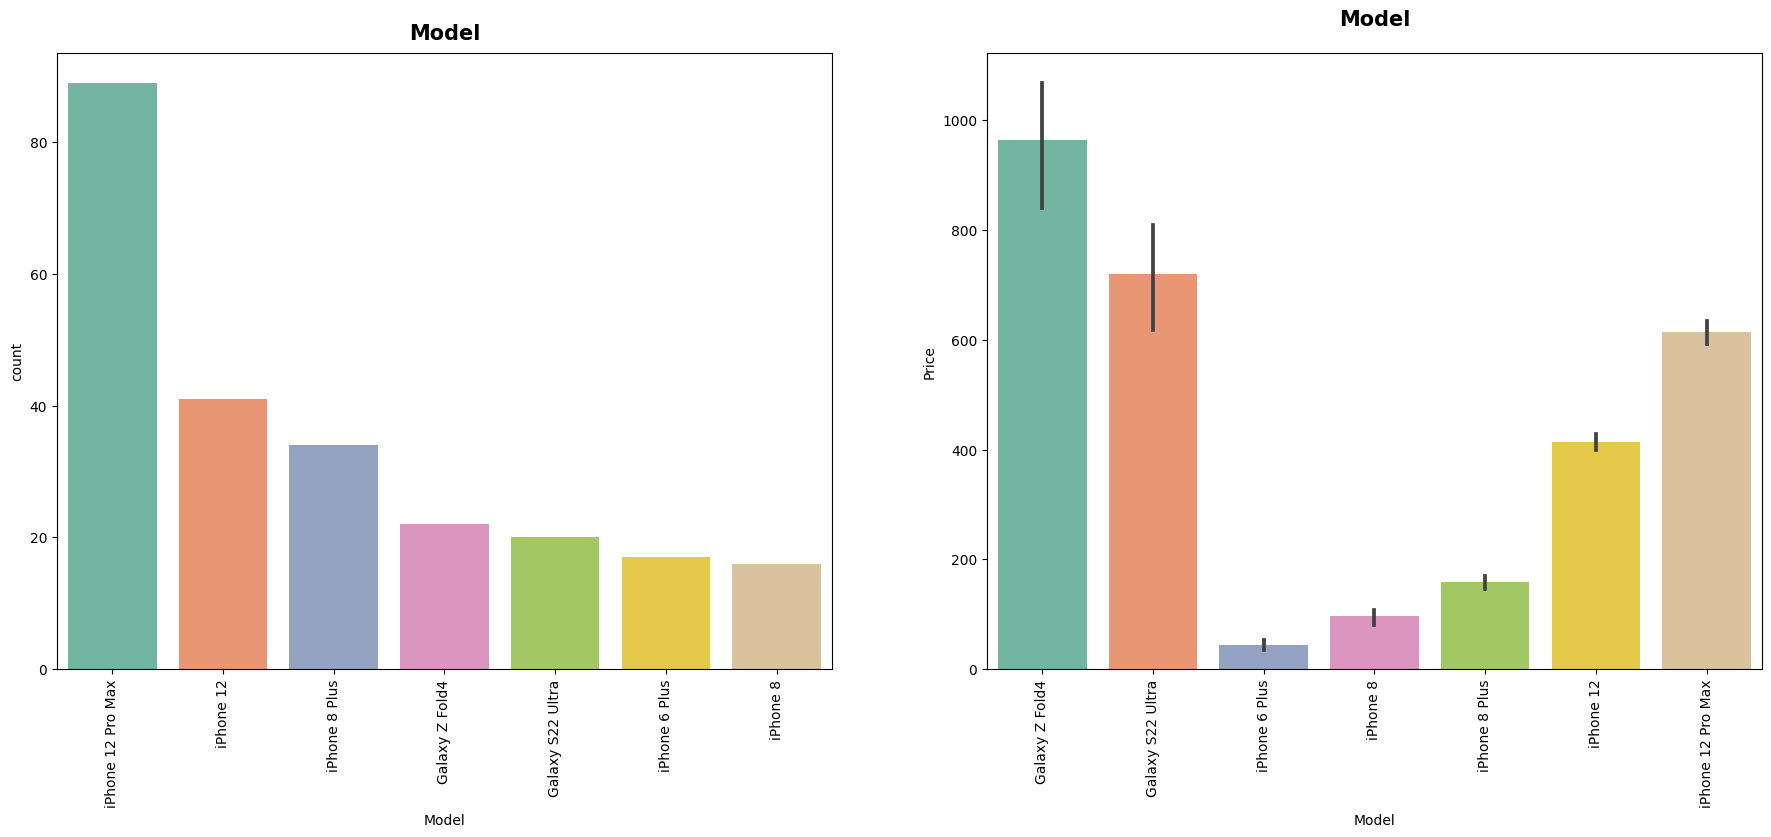

In [16]:
visualize_categorical('Model')

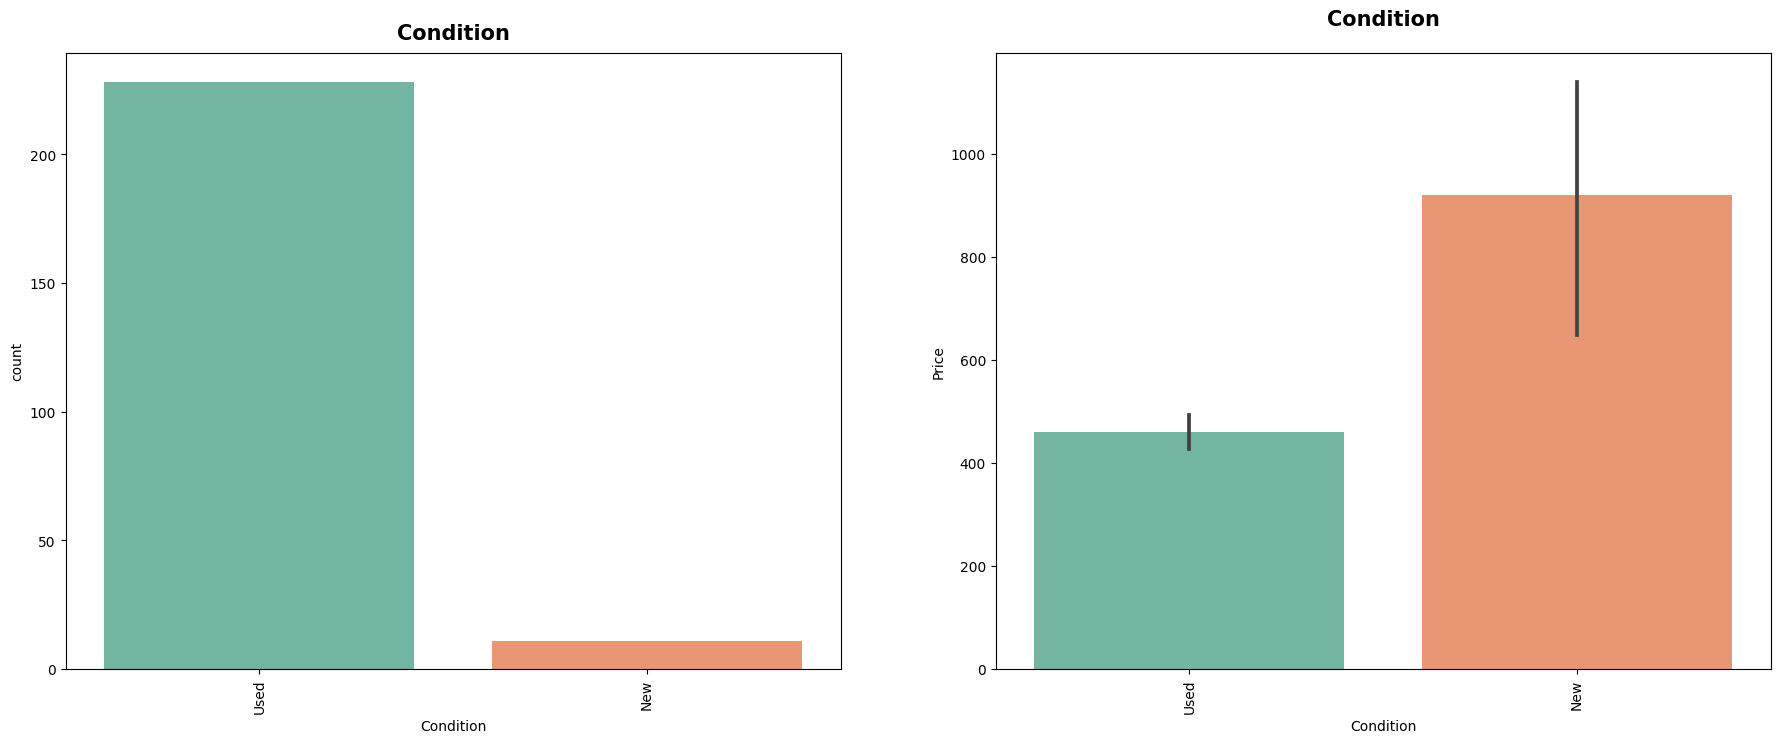

In [17]:
visualize_categorical('Condition')

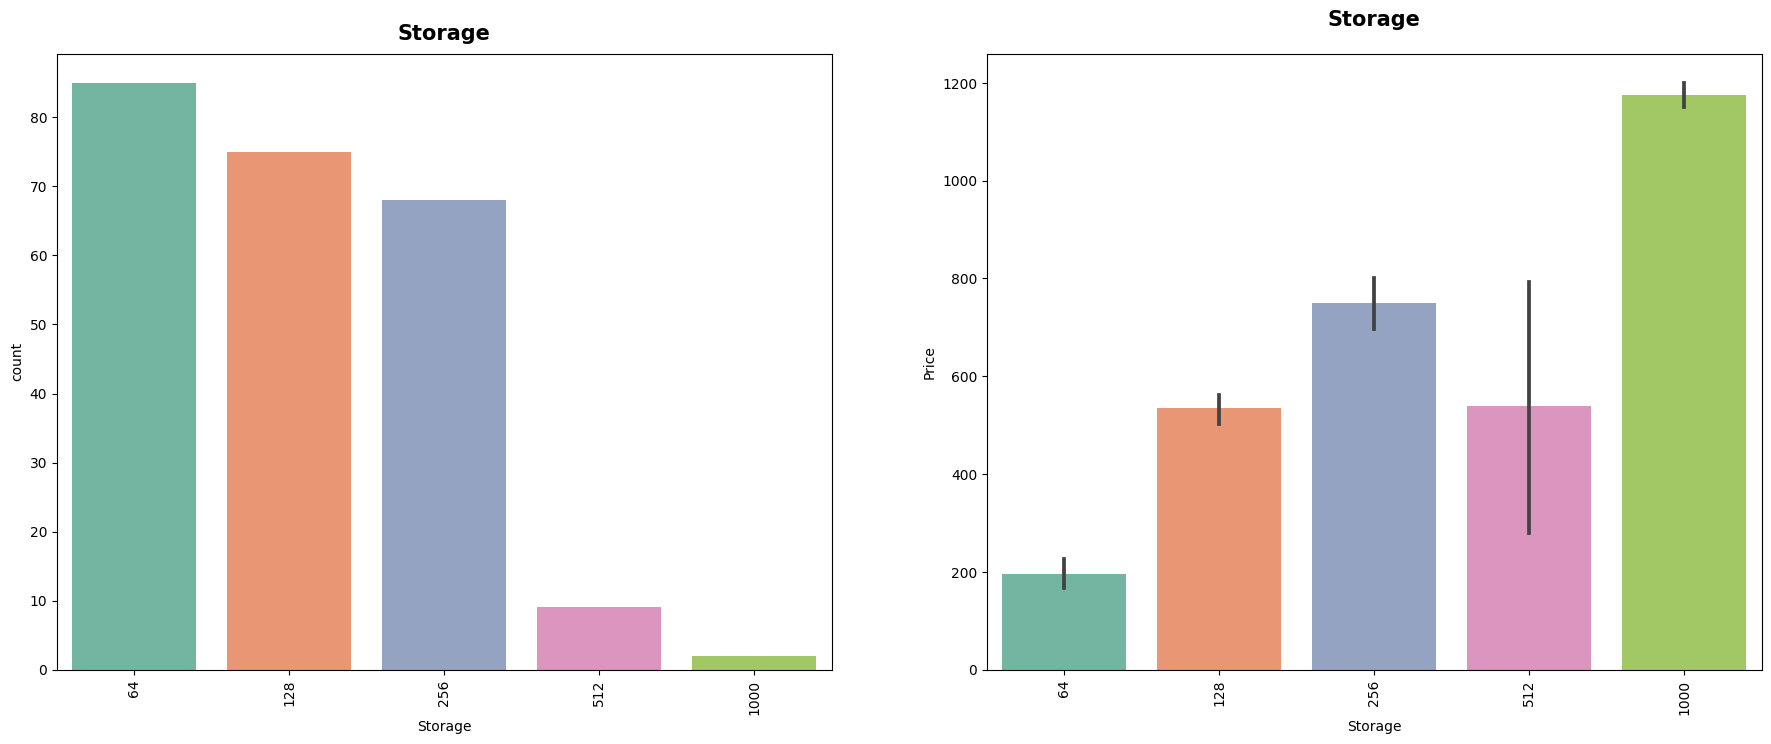

In [18]:
def visualize_numerical(cols):
    plt.figure(figsize = (22, 8))
    plt.subplot(1, 2, 1)
    sns.countplot(x = cols, data = df, palette = 'Set2', order = df[cols].value_counts().index)
    plt.title(f'{cols}', pad = 10, fontweight = 'black', fontsize = 15)
    plt.xticks(rotation = 90)

    plt.subplot(1, 2, 2)
    sns.barplot(x = cols, y = 'Price', data = df, palette = 'Set2')
    plt.title(f'{cols}', pad = 20, fontweight = 'black', fontsize = 15)
    plt.xticks(rotation = 90)
visualize_numerical('Storage')

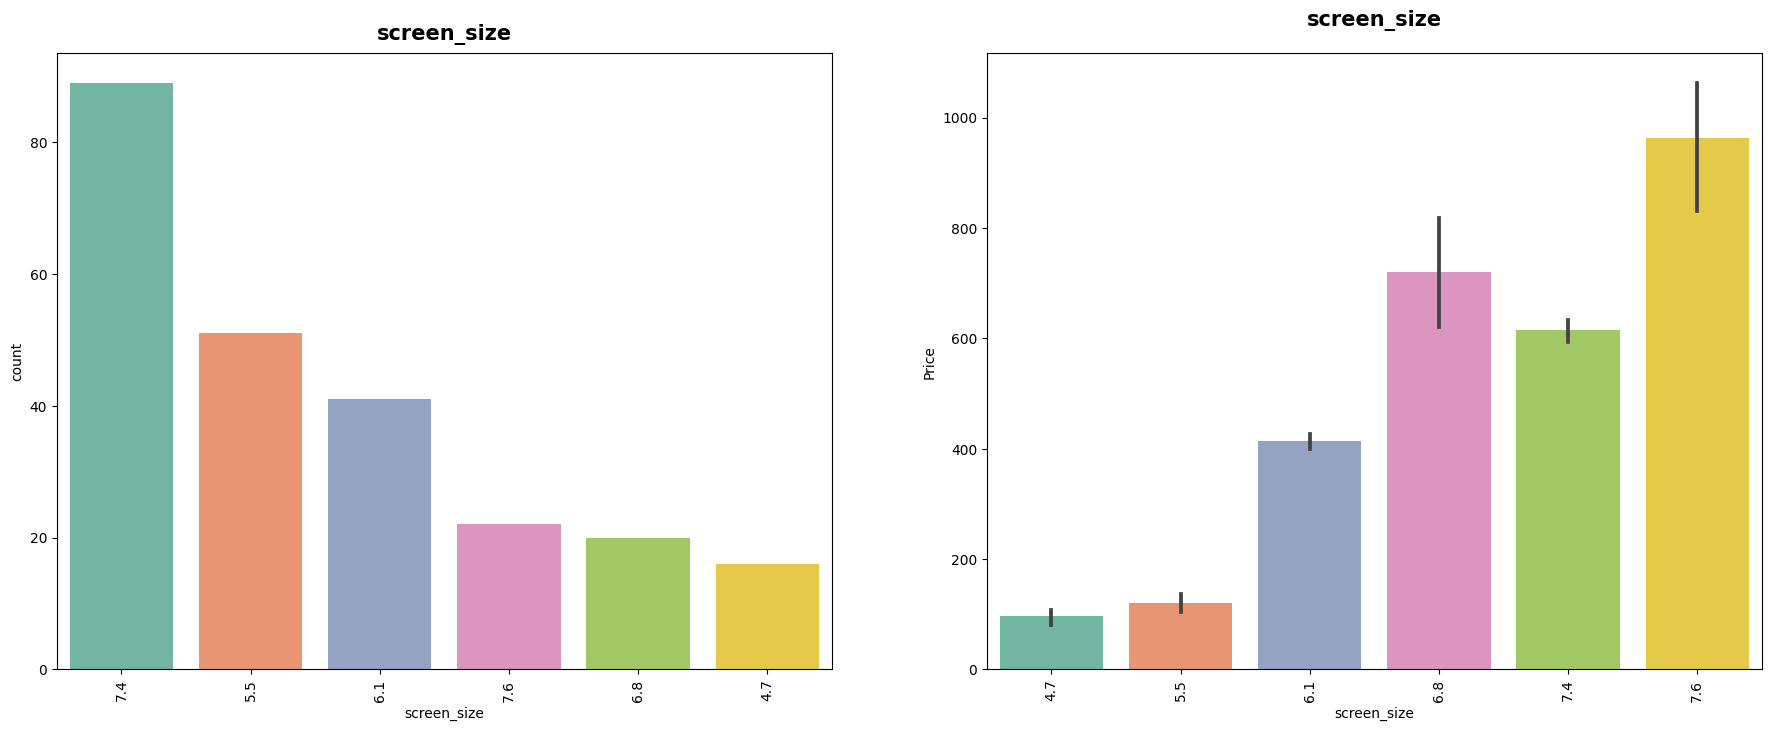

In [19]:
visualize_numerical('screen_size')

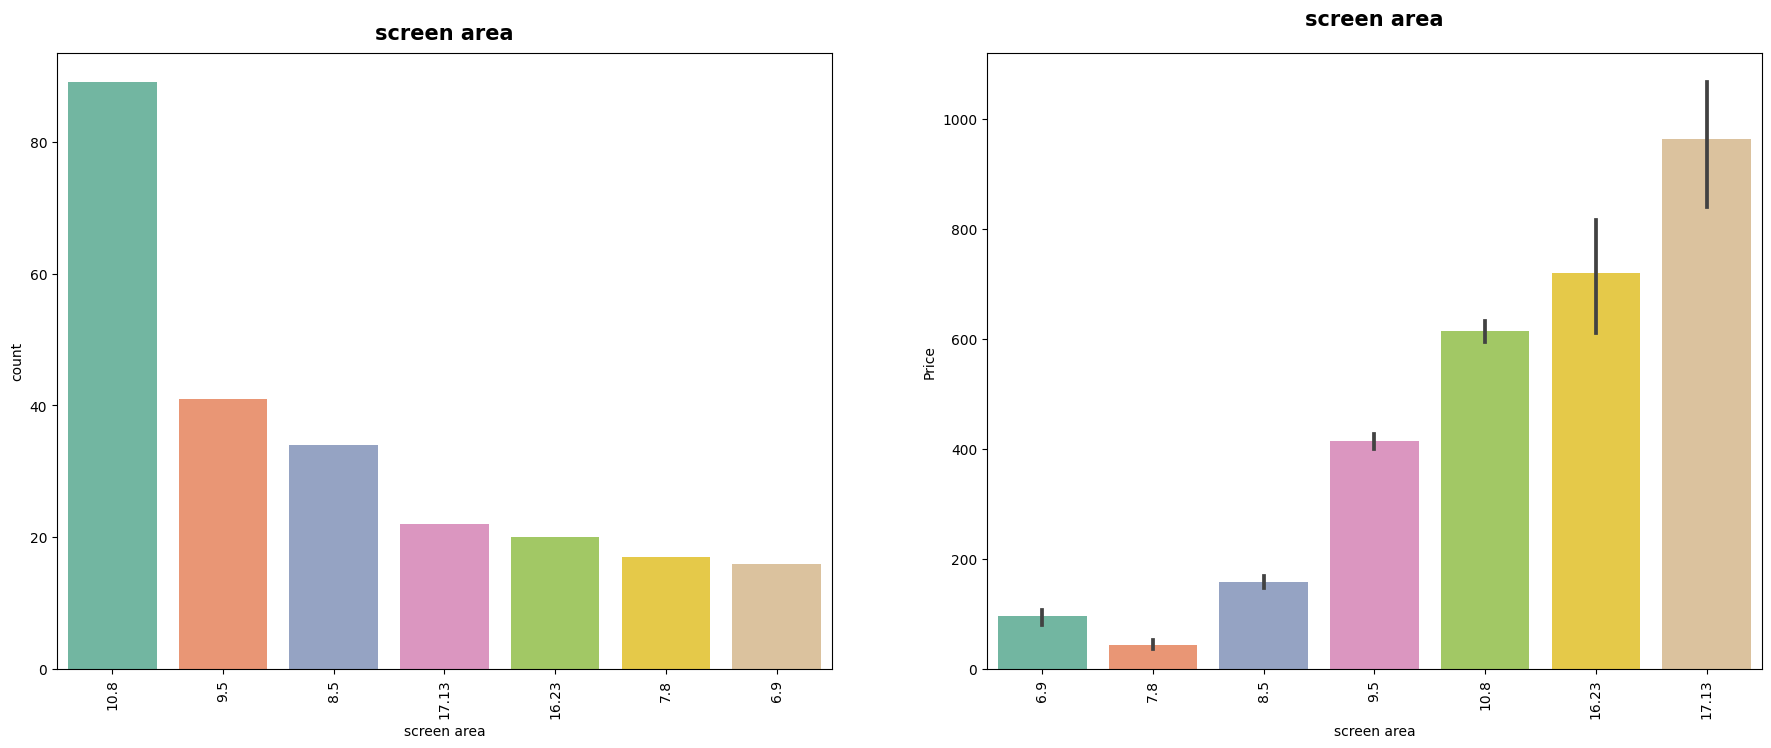

In [20]:
visualize_numerical('screen area')

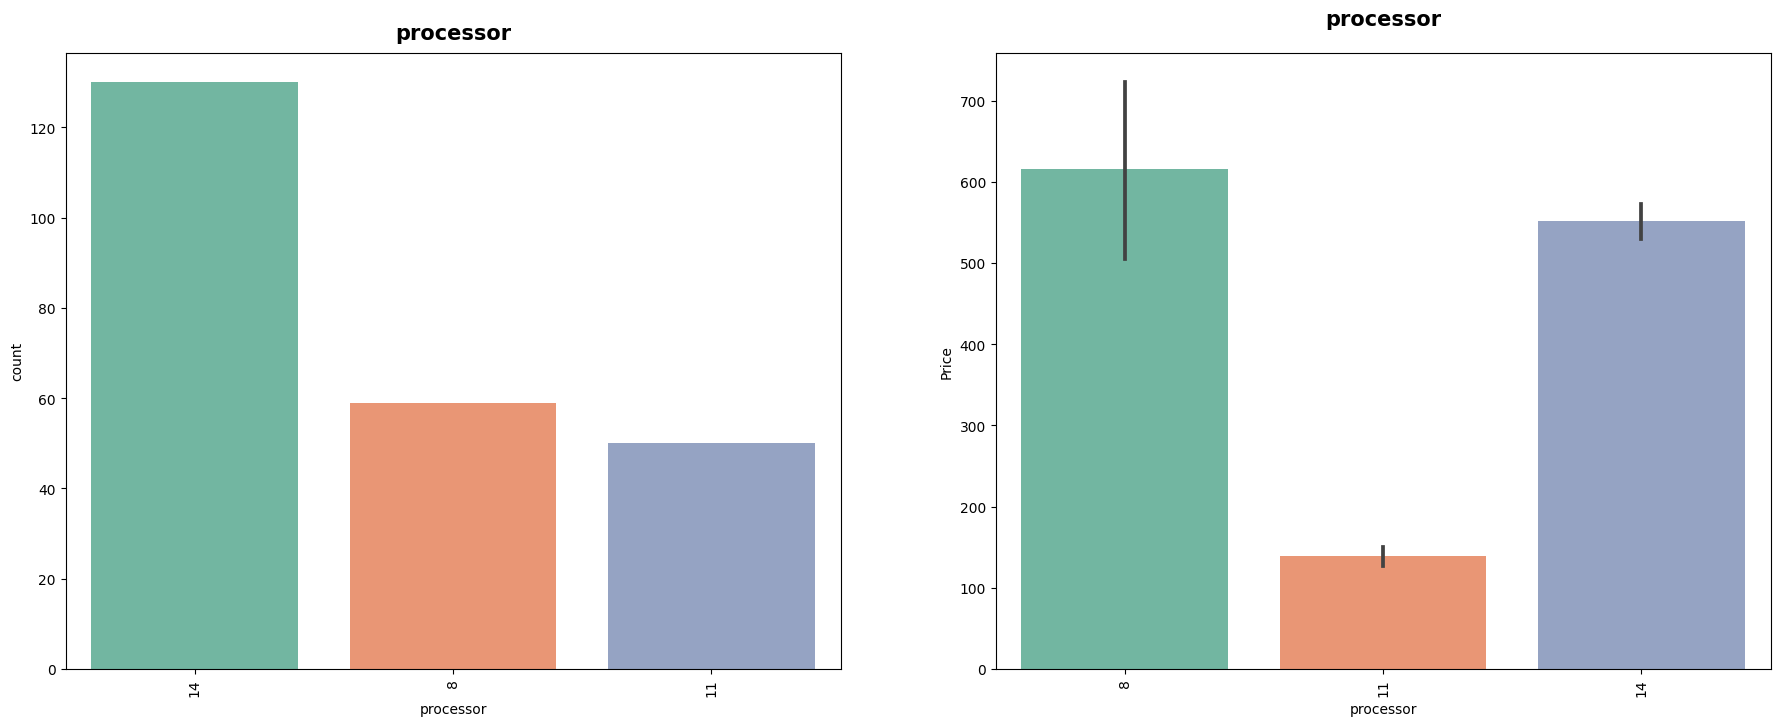

In [21]:
visualize_numerical('processor')

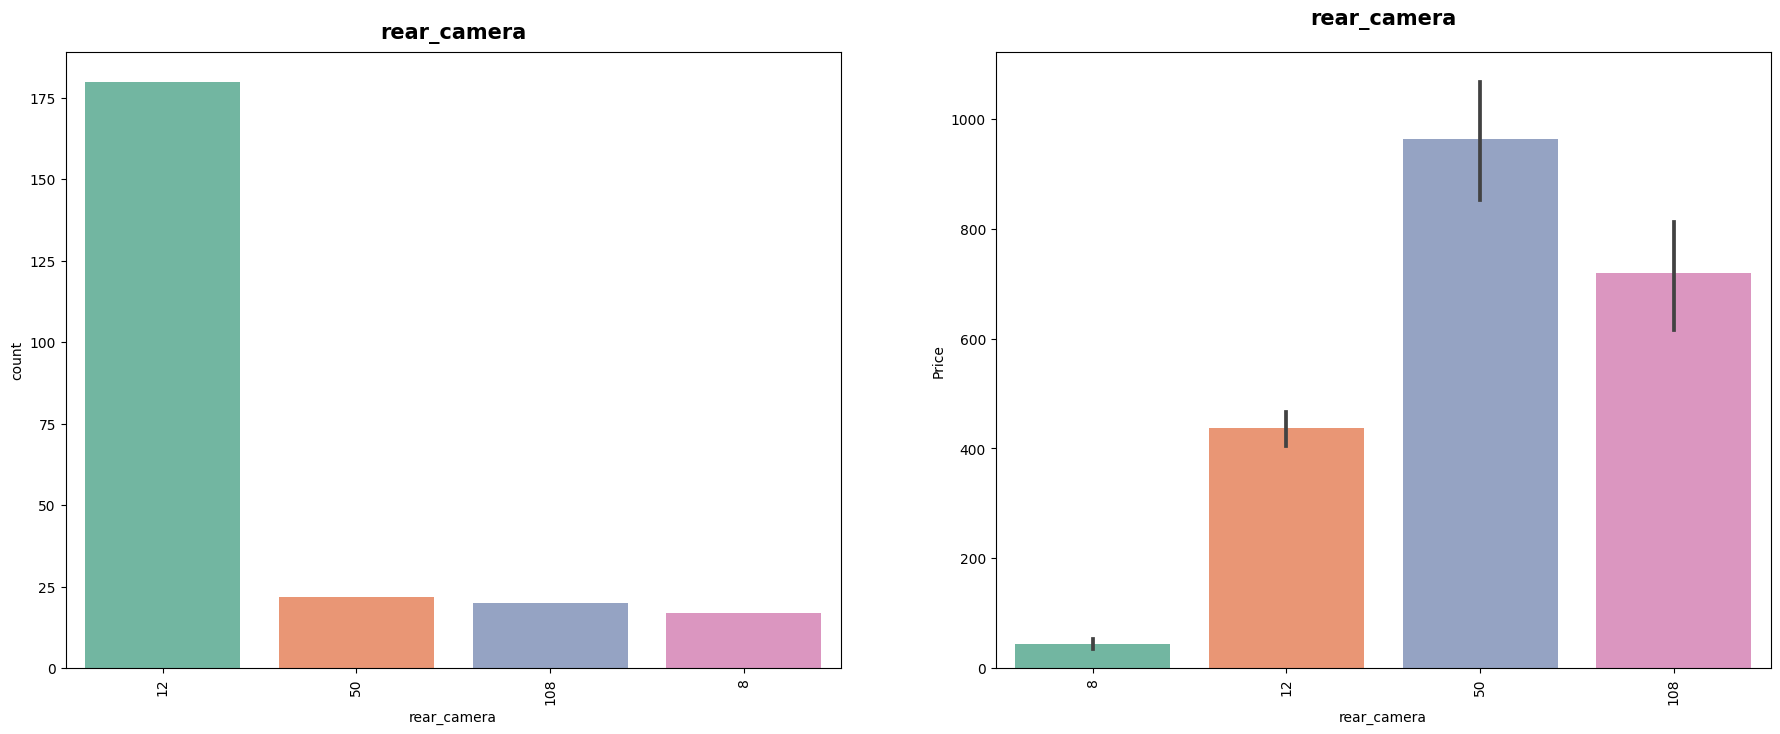

In [22]:
visualize_numerical('rear_camera')

In [23]:
numerical

,Price,Id,Storage,screen_size,screen area,processor,rear_camera,front_camera,battery,operating_system,ram
0,499.0,9419966,128,7.6,17.13,8,50,30.0,4400,12.0,8
1,1000.0,9423865,256,7.6,17.13,8,50,30.0,4400,12.0,8
2,880.0,9423258,512,7.6,17.13,8,50,30.0,4400,12.0,8
3,1249.0,9021923,256,7.6,17.13,8,50,30.0,4400,12.0,8
4,896.0,9024219,256,7.6,17.13,8,50,30.0,4400,12.0,8
...,...,...,...,...,...,...,...,...,...,...,...
234,650.0,9409227,128,7.4,10.80,14,12,12.0,3687,14.1,6
235,620.0,9409201,128,7.4,10.80,14,12,12.0,3687,14.1,6
236,620.0,9408769,128,7.4,10.80,14,12,12.0,3687,14.1,6
237,640.0,9282710,128,7.4,10.80,14,12,12.0,3687,14.1,6


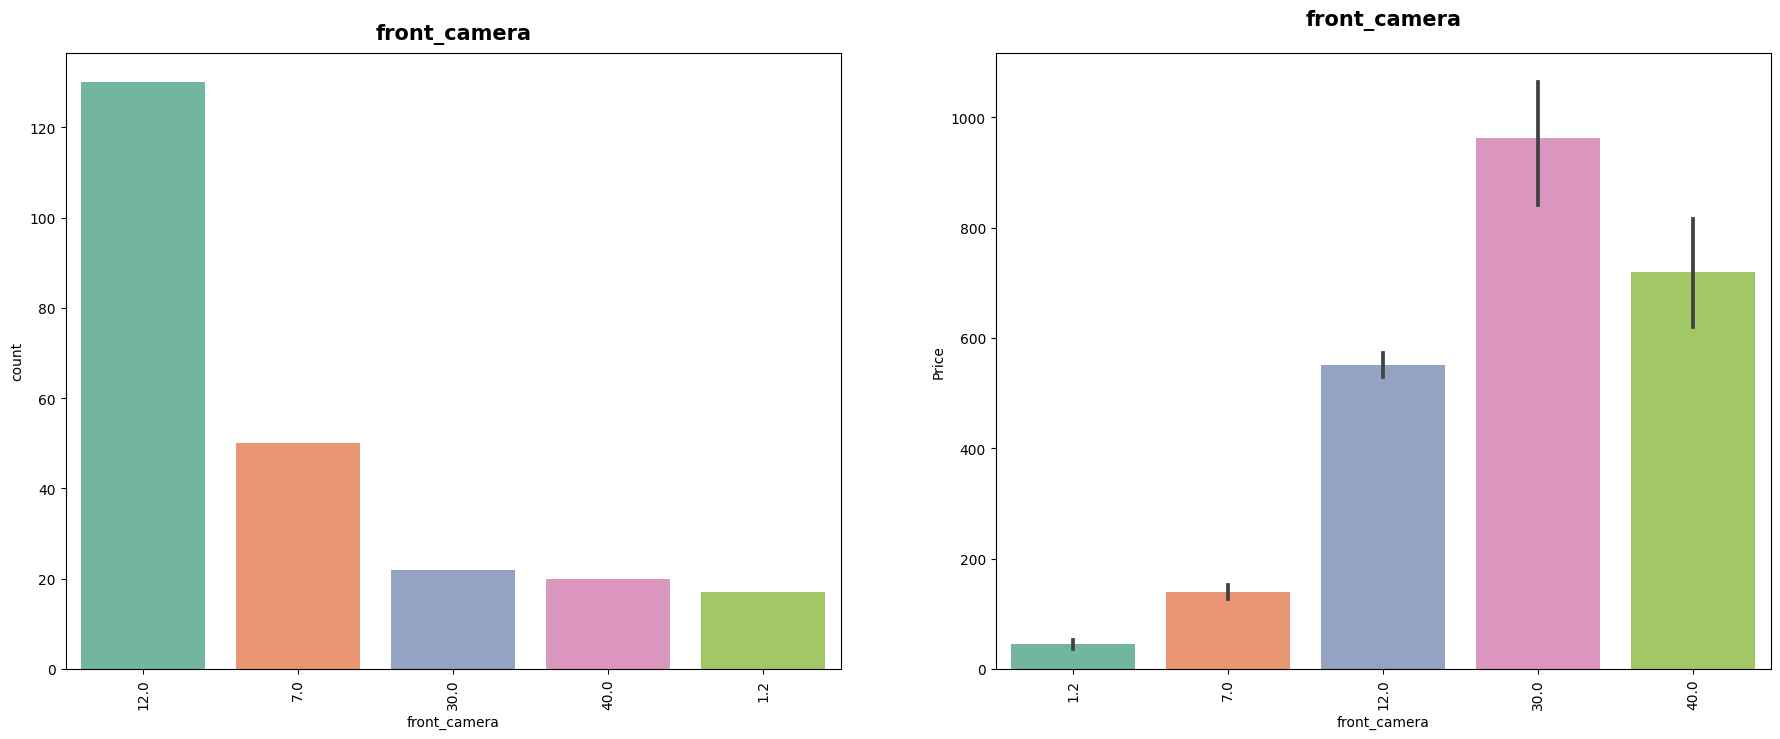

In [24]:
visualize_numerical('front_camera')

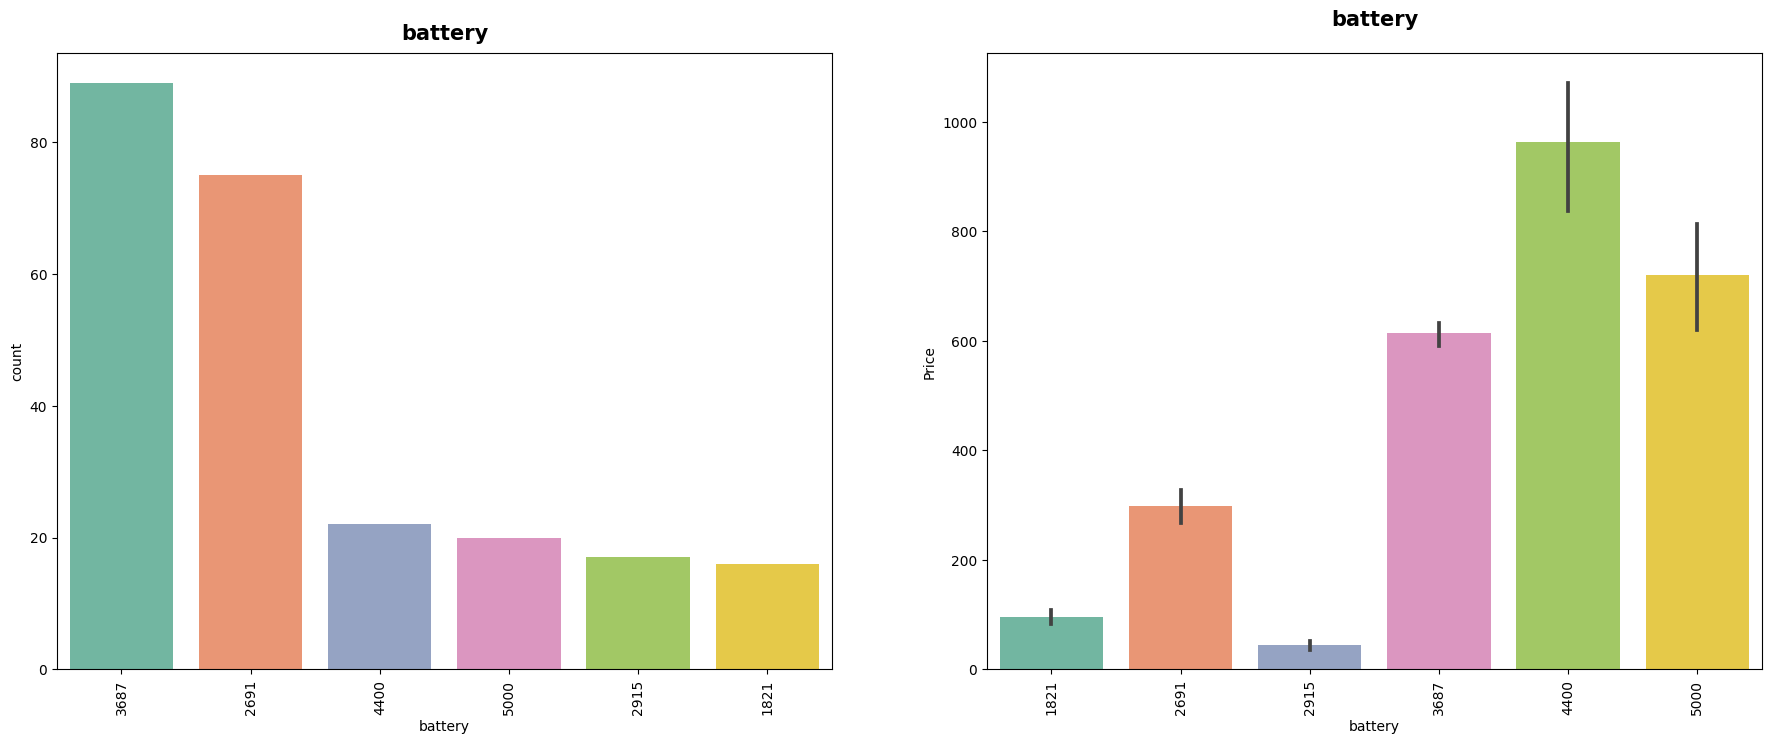

In [25]:
visualize_numerical('battery')

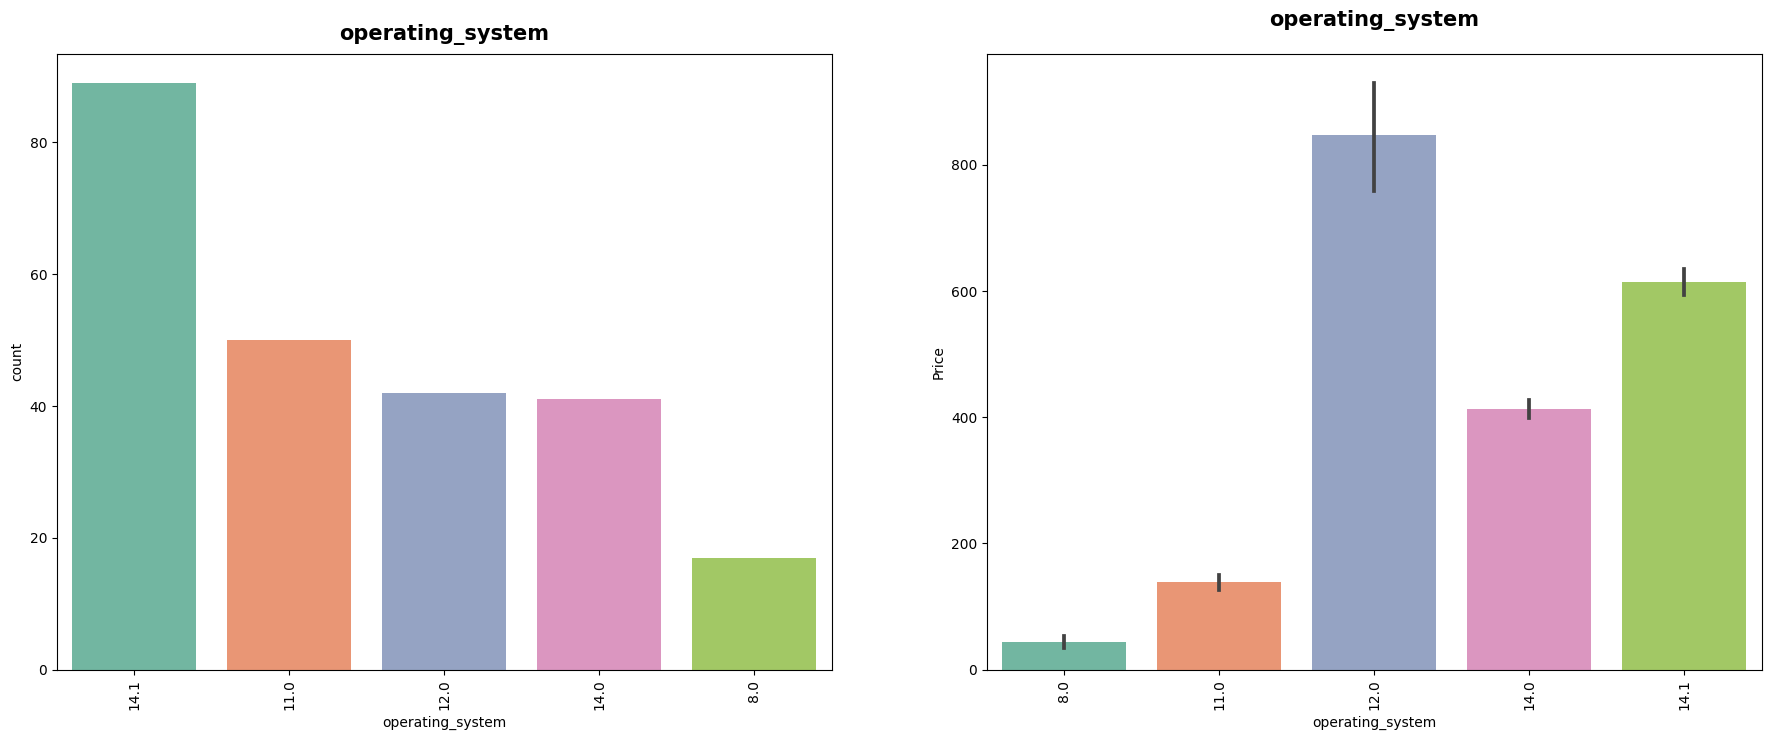

In [26]:
visualize_numerical('operating_system')

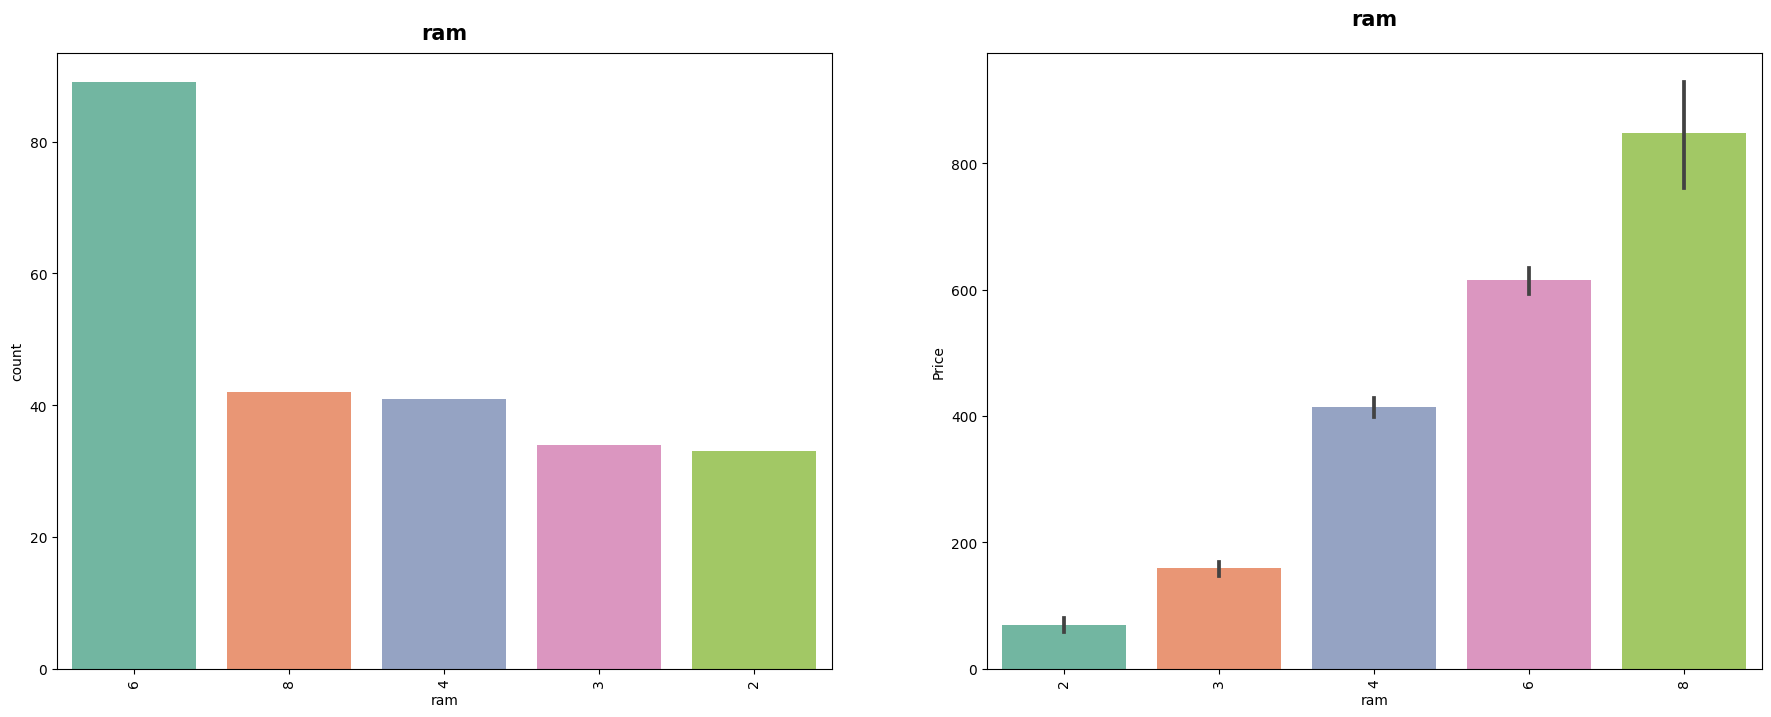

In [27]:
visualize_numerical('ram')

## 4. Data Preprocessing

In [28]:
df = df.drop(df[df['Price'] <= 10].index)
df.shape

(234, 13)

In [29]:
df.shape

(234, 13)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 238
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             234 non-null    float64
 1   Mark              234 non-null    object 
 2   Model             234 non-null    object 
 3   Storage           234 non-null    int64  
 4   Condition         234 non-null    object 
 5   screen_size       234 non-null    float64
 6   screen area       234 non-null    float64
 7   processor         234 non-null    int64  
 8   rear_camera       234 non-null    int64  
 9   front_camera      234 non-null    float64
 10  battery           234 non-null    int64  
 11  operating_system  234 non-null    float64
 12  ram               234 non-null    int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 25.6+ KB


In [31]:
bins = [10, 500, 1000, 1300]
labels = ['low', 'medium', 'high']

df['price_category'] = pd.cut(df['Price'], bins=bins, labels=labels)

In [32]:
df['price_category'].unique()

['low', 'medium', 'high']
Categories (3, object): ['low' < 'medium' < 'high']

In [33]:
df = df.drop(['Price', 'Mark'], axis = 1)

In [34]:
df['price_category'] = df['price_category'].replace({'low': 1, 'medium': 2, 'high': 3})

In [35]:
df['Condition'] = df['Condition'].replace({'Used': 0, 'New': 1})

In [36]:
df['Model'].unique()

array(['Galaxy Z Fold4', 'Galaxy S22 Ultra', 'iPhone 6 Plus', 'iPhone 8',
       'iPhone 8 Plus', 'iPhone 12', 'iPhone 12 Pro Max'], dtype=object)

#### Dummy

In [37]:
# Create dummy variables for the categorical column
data = pd.get_dummies(df['Model'])

# Display the DataFrame
data.head()

,Galaxy S22 Ultra,Galaxy Z Fold4,iPhone 12,iPhone 12 Pro Max,iPhone 6 Plus,iPhone 8,iPhone 8 Plus
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [38]:
data = pd.concat([df, data], axis = 1)

In [39]:
data.head()

,Model,Storage,Condition,screen_size,screen area,processor,rear_camera,front_camera,battery,operating_system,ram,price_category,Galaxy S22 Ultra,Galaxy Z Fold4,iPhone 12,iPhone 12 Pro Max,iPhone 6 Plus,iPhone 8,iPhone 8 Plus
0,Galaxy Z Fold4,128,0,7.6,17.13,8,50,30.0,4400,12.0,8,1,0,1,0,0,0,0,0
1,Galaxy Z Fold4,256,0,7.6,17.13,8,50,30.0,4400,12.0,8,2,0,1,0,0,0,0,0
2,Galaxy Z Fold4,512,0,7.6,17.13,8,50,30.0,4400,12.0,8,2,0,1,0,0,0,0,0
3,Galaxy Z Fold4,256,1,7.6,17.13,8,50,30.0,4400,12.0,8,3,0,1,0,0,0,0,0
4,Galaxy Z Fold4,256,0,7.6,17.13,8,50,30.0,4400,12.0,8,2,0,1,0,0,0,0,0


In [40]:
data = data.drop(['Model'], axis = 1)

In [41]:
data.describe()

,Storage,Condition,screen_size,screen area,processor,rear_camera,front_camera,battery,operating_system,ram,Galaxy S22 Ultra,Galaxy Z Fold4,iPhone 12,iPhone 12 Pro Max,iPhone 6 Plus,iPhone 8,iPhone 8 Plus
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,159.794872,0.042735,6.562393,10.791880,11.935897,22.931624,14.103419,3365.965812,12.657265,5.025641,0.081197,0.089744,0.175214,0.376068,0.068376,0.064103,0.145299
std,124.697577,0.202693,0.932598,2.946551,2.503250,27.617941,10.097367,816.883835,1.801278,1.969560,0.273722,0.286427,0.380965,0.485436,0.252931,0.245461,0.353158
min,64.000000,0.000000,4.700000,6.900000,8.000000,8.000000,1.200000,1821.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.000000,0.000000,5.500000,8.500000,11.000000,12.000000,7.000000,2691.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,0.000000,6.800000,10.800000,14.000000,12.000000,12.000000,3687.000000,14.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,256.000000,0.000000,7.400000,10.800000,14.000000,12.000000,12.000000,3687.000000,14.100000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1000.000000,1.000000,7.600000,17.130000,14.000000,108.000000,40.000000,5000.000000,14.100000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn.preprocessing import MinMaxScaler
scalar  = MinMaxScaler()
scaled_data = scalar.fit_transform(data)

In [43]:
scaled_data

array([[0.06837607, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20512821, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47863248, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06837607, 0.        , 0.93103448, ..., 0.        , 0.        ,
        0.        ],
       [0.06837607, 1.        , 0.93103448, ..., 0.        , 0.        ,
        0.        ],
       [0.06837607, 0.        , 0.93103448, ..., 0.        , 0.        ,
        0.        ]])

In [44]:
features = pd.DataFrame(scaled_data, columns = data.columns)
features

,Storage,Condition,screen_size,screen area,processor,rear_camera,front_camera,battery,operating_system,ram,price_category,Galaxy S22 Ultra,Galaxy Z Fold4,iPhone 12,iPhone 12 Pro Max,iPhone 6 Plus,iPhone 8,iPhone 8 Plus
0,0.068376,0.0,1.000000,1.000000,0.0,0.42,0.742268,0.811261,0.655738,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.205128,0.0,1.000000,1.000000,0.0,0.42,0.742268,0.811261,0.655738,1.000000,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.478632,0.0,1.000000,1.000000,0.0,0.42,0.742268,0.811261,0.655738,1.000000,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.205128,1.0,1.000000,1.000000,0.0,0.42,0.742268,0.811261,0.655738,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.205128,0.0,1.000000,1.000000,0.0,0.42,0.742268,0.811261,0.655738,1.000000,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.068376,0.0,0.931034,0.381232,1.0,0.04,0.278351,0.586977,1.000000,0.666667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
230,0.068376,0.0,0.931034,0.381232,1.0,0.04,0.278351,0.586977,1.000000,0.666667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
231,0.068376,0.0,0.931034,0.381232,1.0,0.04,0.278351,0.586977,1.000000,0.666667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232,0.068376,1.0,0.931034,0.381232,1.0,0.04,0.278351,0.586977,1.000000,0.666667,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
features.describe()

,Storage,Condition,screen_size,screen area,processor,rear_camera,front_camera,battery,operating_system,ram,price_category,Galaxy S22 Ultra,Galaxy Z Fold4,iPhone 12,iPhone 12 Pro Max,iPhone 6 Plus,iPhone 8,iPhone 8 Plus
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,0.102345,0.042735,0.642205,0.380438,0.655983,0.149316,0.332562,0.485991,0.763486,0.504274,0.271368,0.081197,0.089744,0.175214,0.376068,0.068376,0.064103,0.145299
std,0.133224,0.202693,0.321585,0.288030,0.417208,0.276179,0.260241,0.256963,0.295292,0.328260,0.293112,0.273722,0.286427,0.380965,0.485436,0.252931,0.245461,0.353158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.275862,0.156403,0.500000,0.040000,0.149485,0.273671,0.491803,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.068376,0.000000,0.724138,0.381232,1.000000,0.040000,0.278351,0.586977,0.983607,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.205128,0.000000,0.931034,0.381232,1.000000,0.040000,0.278351,0.586977,1.000000,0.666667,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
X = data.drop(['price_category'], axis = 1)
y = data['price_category']

In [47]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [48]:
y_label = np.array(y)

# encode the lables if they are not already in integer format

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_label)

# create an instance of SelectKBest with mutual information as the score function

skb = SelectKBest(score_func = mutual_info_classif, k = 10)
best_feature_fit = skb.fit(X, y_encoded)

In [49]:
# Mapping to Feature Name
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [50]:
feature_scores

,Feature_Scores
0,0.416882
1,0.038211
2,0.585401
3,0.607792
4,0.224578
5,0.259710
6,0.395589
7,0.612622
8,0.603419
9,0.580142


In [51]:
feature_column_names = pd.DataFrame(X.columns, columns = ['Feature_Names'])
best_df = pd.concat([feature_scores, feature_column_names], axis = 1)

In [52]:
best_df

,Feature_Scores,Feature_Names
0,0.416882,Storage
1,0.038211,Condition
2,0.585401,screen_size
3,0.607792,screen area
4,0.224578,processor
5,0.259710,rear_camera
6,0.395589,front_camera
7,0.612622,battery
8,0.603419,operating_system
9,0.580142,ram


In [53]:
# the important features
best_df.nlargest(10, 'Feature_Scores')

,Feature_Scores,Feature_Names
7,0.612622,battery
3,0.607792,screen area
8,0.603419,operating_system
2,0.585401,screen_size
9,0.580142,ram
0,0.416882,Storage
6,0.395589,front_camera
13,0.286484,iPhone 12 Pro Max
5,0.259710,rear_camera
4,0.224578,processor


## 5. Model Building

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
print(f'Data train: {X_train.shape, y_train.shape}')
print(f'Data test: {X_test.shape, y_test.shape}')

Data train: ((163, 17), (163,))
Data test: ((71, 17), (71,))


### 5.1. Linear regression

In [57]:
Algorithms = {'Training Score': [],
        'Testing Score' : [],
        'Algorithms': []
        }

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

def model_prediction(x_train, x_test, y_train, y_test, model, name):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    a = r2_score(y_train,y_train_pred)*100
    b = r2_score(y_test,y_test_pred)*100
    
    Algorithms['Algorithms'].append(name)
    Algorithms['Training Score'].append(a)
    Algorithms['Testing Score'].append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
    print(f"MSE of {model} model on Testing Data is:", mean_squared_error(y_test_pred, y_test))

In [59]:
from sklearn.linear_model import LinearRegression
model_prediction(X_train, X_test, y_train, y_test, LinearRegression(), 'Linear Regression')

r2_Score of LinearRegression() model on Training Data is: 82.51736621254989
r2_Score of LinearRegression() model on Testing Data is: 80.72335193765059
MSE of LinearRegression() model on Testing Data is: 0.06286611667229206


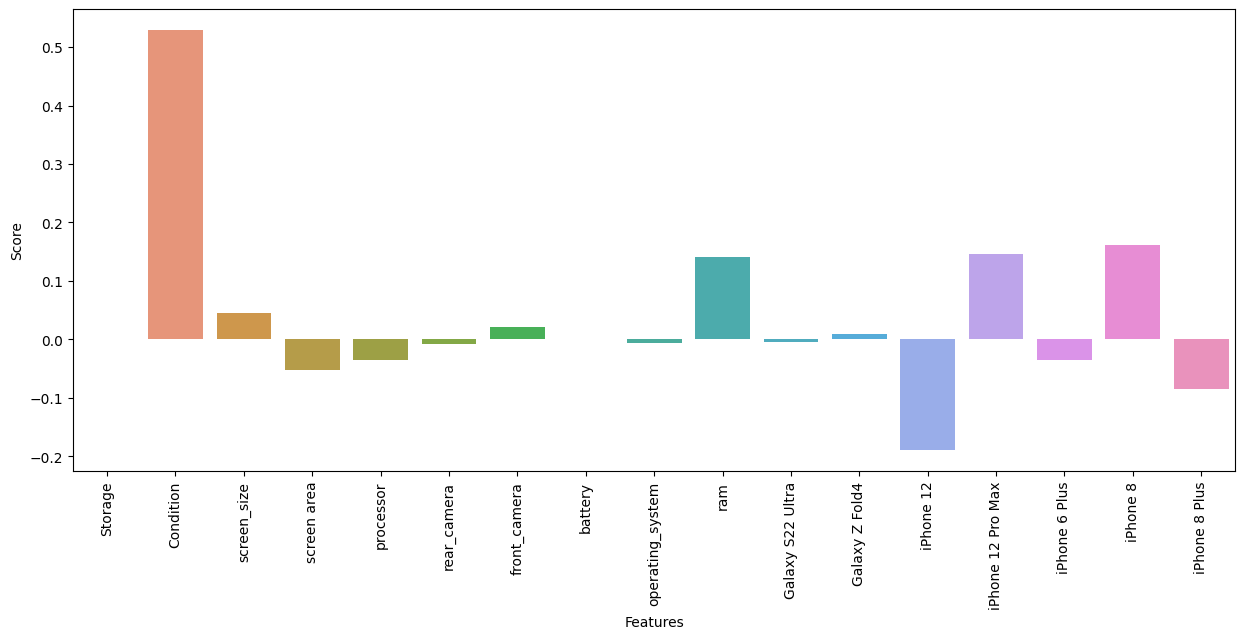

In [60]:
def features_importance(x_train, y_train, lm):
    lm.fit(x_train, y_train)

    df_importance_l_d = pd.DataFrame()
    df_importance_l_d['Features'] = x_train.columns
    df_importance_l_d['Score'] = lm.coef_

    plt.figure(figsize = (15, 6))

    sns.barplot(x= 'Features', y = 'Score', data = df_importance_l_d )
    plt.xticks(rotation = 90)
    plt.show()
    
lm = LinearRegression()
features_importance(X_train, y_train, lm)

In [61]:
import statsmodels.api as sm  

def ODL_checking(X_train_rfec, y_train):
    X_train_rfec = sm.add_constant(X_train_rfec)
    lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

    #Summary of linear model
    print(lm_rfe.summary())
    return lm_rfe

In [62]:
ODL_checking(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:         price_category   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     90.86
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.23e-54
Time:                        09:21:10   Log-Likelihood:                -3.0559
No. Observations:                 163   AIC:                             24.11
Df Residuals:                     154   BIC:                             51.96
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0140      0.00

In [63]:
import statsmodels.api as sm

def drop_high_pvalue_features(X, y, alpha=0.050):
    """
    Drops one feature at a time based on the p-value until all p-values are less than or equal to the specified alpha level.
    
    Parameters:
        X (pandas DataFrame): The DataFrame containing the independent variables.
        y (pandas Series): The Series containing the dependent variable.
        alpha (float): The alpha level above which features will be dropped. Default is 0.05.
    
    Returns:
        pandas DataFrame: The DataFrame with high p-value features dropped.
    """
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Iterate until all p-values are less than or equal to the alpha level
    while results.pvalues.max() > alpha:
        # Drop the feature with the highest p-value
        drop_feature = results.pvalues.idxmax()
        X = X.drop(columns=[drop_feature], axis='columns')
        # Fit a new OLS model with the remaining features
        model = sm.OLS(y, X)
        results = model.fit()
    
    return X

In [64]:
X_train_new = drop_high_pvalue_features(X_train, y_train)
ODL_checking(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:         price_category   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     104.2
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.55e-55
Time:                        09:21:10   Log-Likelihood:                -3.2610
No. Observations:                 163   AIC:                             22.52
Df Residuals:                     155   BIC:                             47.27
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4694      0.52

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False) 
    vif = vif.reset_index(drop = True)
    return vif

In [66]:
VIF(X_train_new)

,Features,VIF
0,screen_size,110.53
1,processor,46.16
2,ram,33.94
3,Storage,4.13
4,iPhone 12 Pro Max,2.23
5,iPhone 8,1.18
6,Condition,1.12


In [67]:
def drop_high_vif_features(features, vif_thresh=5):
    """
    Drops one feature at a time based on the VIF value until all VIF values are less than or equal to the specified threshold.
    
    Parameters:
        df (pandas DataFrame): The DataFrame to check for high VIF values.
        vif_thresh (float): The threshold VIF value above which features will be dropped. Default is 5.
    
    Returns:
        pandas DataFrame: The DataFrame with high VIF features dropped.
    """
    vifs = pd.Series([variance_inflation_factor(features.values, i) for i in range(features.shape[1])], index=features.columns)
    
    # Iterate until all VIF values are less than or equal to the threshold
    while vifs.max() > vif_thresh:
        # Drop the feature with the highest VIF value
        drop_feature = vifs.idxmax()
        features = features.drop(columns=[drop_feature])
        
        # Re-calculate VIF values for remaining features
        vifs = pd.Series([variance_inflation_factor(features.values, i) for i in range(features.shape[1])], index=features.columns)
    
    return features

In [68]:
X_train_new1 = drop_high_vif_features(X_train_new)
VIF(X_train_new1)

,Features,VIF
0,processor,3.17
1,Storage,2.15
2,iPhone 12 Pro Max,1.96
3,iPhone 8,1.12
4,Condition,1.06


In [69]:
ODL_checking(X_train_new1, y_train)

                            OLS Regression Results                            
Dep. Variable:         price_category   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     73.52
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.36e-39
Time:                        09:21:10   Log-Likelihood:                -46.870
No. Observations:                 163   AIC:                             105.7
Df Residuals:                     157   BIC:                             124.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8803      0.17

In [70]:
X_train_new2 = drop_high_pvalue_features(X_train_new1, y_train)
ODL_checking(X_train_new2, y_train)

                            OLS Regression Results                            
Dep. Variable:         price_category   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     91.57
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           3.96e-40
Time:                        09:21:10   Log-Likelihood:                -47.435
No. Observations:                 163   AIC:                             104.9
Df Residuals:                     158   BIC:                             120.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.8613      0.17

## 5.2.  Ridge Regressor

r2_Score of Ridge(alpha=0.6866488450043002) model on Training Data is: 82.48266273685213
r2_Score of Ridge(alpha=0.6866488450043002) model on Testing Data is: 80.63860961236784
MSE of Ridge(alpha=0.6866488450043002) model on Testing Data is: 0.06314248323203182


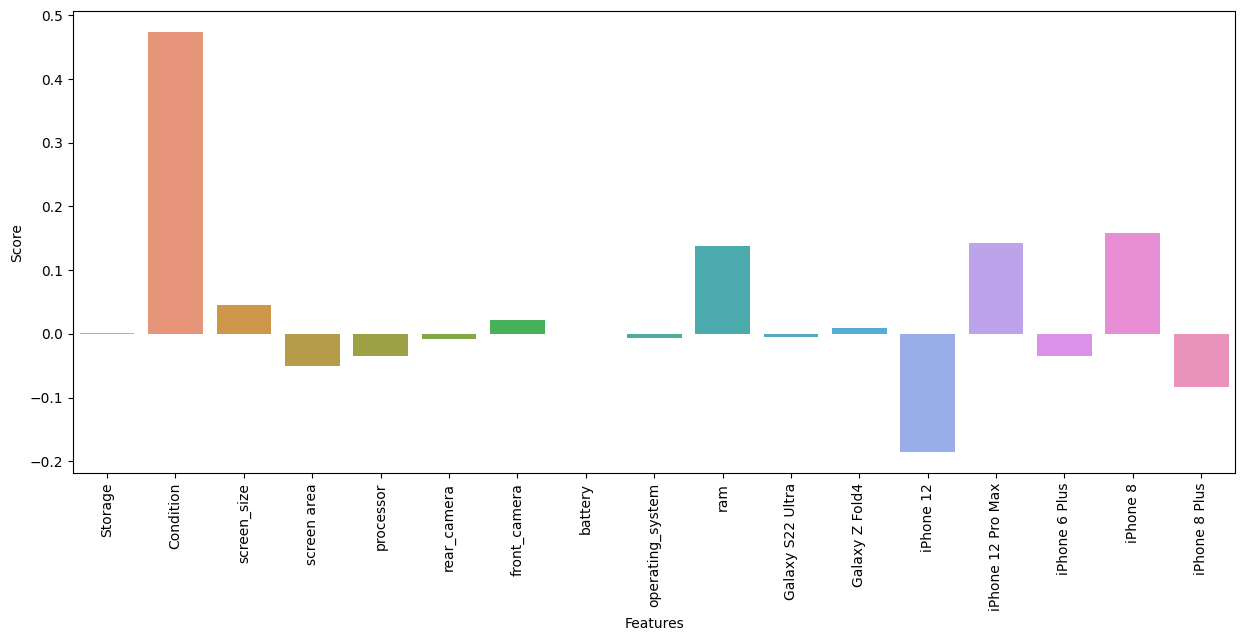

In [71]:
from sklearn.linear_model import Ridge, RidgeCV

ridgecv = RidgeCV(alphas=np.logspace(-2, 3, num=50))
ridgecv.fit(X_train, y_train)
alpha = ridgecv.alpha_
model_prediction(X_train, X_test, y_train, y_test, Ridge(alpha=alpha), 'Ridge Regression Model')
features_importance(X_train, y_train, Ridge(alpha=alpha))

### 5.3. Lasso Regressor

r2_Score of Lasso(alpha=0.01) model on Training Data is: 81.02079867161308
r2_Score of Lasso(alpha=0.01) model on Testing Data is: 78.8036855306337
MSE of Lasso(alpha=0.01) model on Testing Data is: 0.06912664349858796


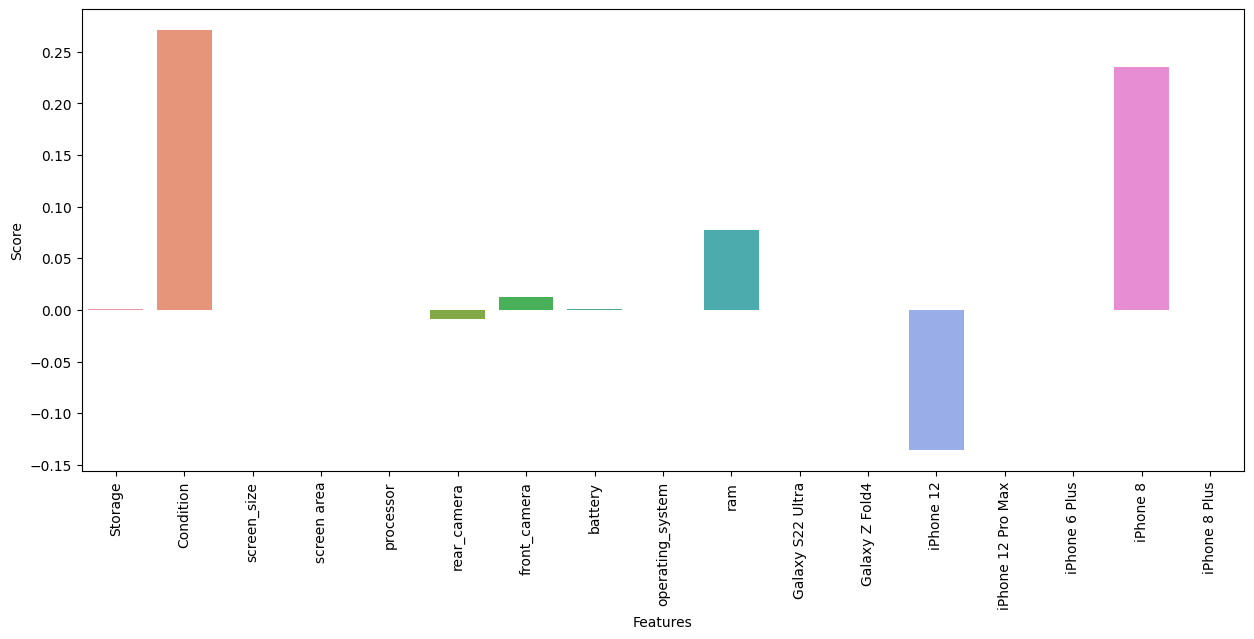

In [72]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas=np.logspace(-2, 3, num=50))
lasso_cv.fit(X_train, y_train)
alpha = lasso_cv.alpha_
model_prediction(X_train, X_test, y_train, y_test, Lasso(alpha=alpha), 'Lasso Regresion Model')

features_importance(X_train, y_train, Lasso(alpha=alpha))

## 6. Comparision

In [73]:
df_model = pd.DataFrame.from_dict(Algorithms)
df_model

,Training Score,Testing Score,Algorithms
0,82.517366,80.723352,Linear Regression
1,82.482663,80.638610,Ridge Regression Model
2,81.020799,78.803686,Lasso Regresion Model


## 7. Other technique

### 7.1. Random Forest

In [76]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
y_pred = rf_model.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
test_score

0.9295774647887324

In [79]:
y_pred_train = rf_model.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

0.9447852760736196

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        32
           2       0.88      1.00      0.94        36
           3       1.00      0.67      0.80         3

    accuracy                           0.93        71
   macro avg       0.96      0.85      0.89        71
weighted avg       0.94      0.93      0.93        71



In [81]:

feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':rf_model.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,screen area,0.209131
1,ram,0.207190
2,battery,0.177639
3,screen_size,0.133397
4,Storage,0.115882


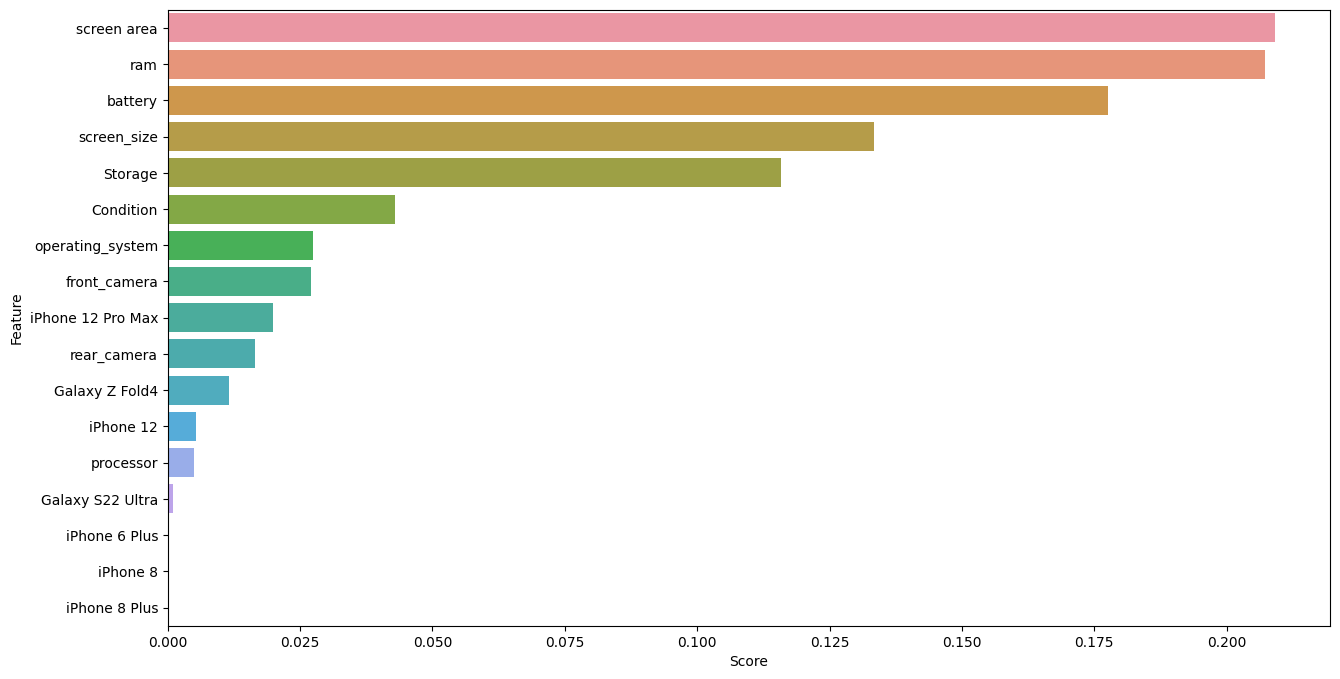

In [82]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

### 7.2. Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [84]:
y_pred_test = dtc.predict(X_test)
y_pred_train = dtc.predict(X_train)

In [85]:
accuracy_score(y_test, y_pred_test)

0.9295774647887324

In [86]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        28
           2       1.00      0.88      0.94        41
           3       0.67      1.00      0.80         2

    accuracy                           0.93        71
   macro avg       0.85      0.96      0.89        71
weighted avg       0.94      0.93      0.93        71

